In [2]:
words = open('names.txt', 'r').read()
words = words.splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In the beginning, we shall start with a Bigram language model.

A Bigram language model works with two characters a time and given a single character, it's job is to predict the next character in the sequence.

For example with `'emma'`, what character is likely to follow `'e'`? What character is likely to follow `'m'`? and so on...

This kind of language model is very simple and weak since it doesn't view all the characters before the current one, but it's a great place to start.

In [3]:
# Taking a look at the bigrams

for w in words[:1]:
    for ch1, ch2 in zip(w, w[1:]):
        print(ch1, ch2)

e m
m m
m a


There is actually more information here than just the characters.

From the example above, we can see that `'e'` comes first and `'a'` comes last. 

We can capture this information by creating some special "start" and "end" tokens.

We can use `'<S>'` to denote the "start" character and `<E>'` to denote the "end" character.

In [4]:
# Adding in "start" and "end" tokens
for w in words[:3]:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>


In [5]:
# Taking a look at the counts of each of the bigrams
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        # get(, 0) returns value from key, 0 if key doesn't exist
        b[bigram] = b.get(bigram, 0) + 1
b

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [6]:
# bigrams counts sorted from greatest to least 
sorted(b.items(), key = lambda x : -x[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

It looks like `'n'` is very frequently to be an ending character.

As well as `'a'`.

That's cool, but it will be much more convenient to keep our data of the bigrams in a 2-Dimensional array, instead of a python dictionary.

We can organize it in a way such that the rows are going to be first character of the bigram the columns are going to be the second character, and each entry can tell us how many times the second character follows the first in the dataset.

A deep learning framework like PyTorch can help us do this.

PyTorch has `Tensors` which allow us to create multi-dimensional arrays and manipulate them very efficiently.

In [7]:
import torch

In [8]:
# allows easier indexing
a = torch.zeros(size=(3, 5), dtype=torch.int32)
a[1, 3] = 1
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [9]:
# kinda cumbersome
b = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
b[1][3] = 1

In [10]:
# port bigram counts to tensor
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i, s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

In [11]:
N = torch.zeros(size = (28, 28), dtype=torch.int32)

for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1
N

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

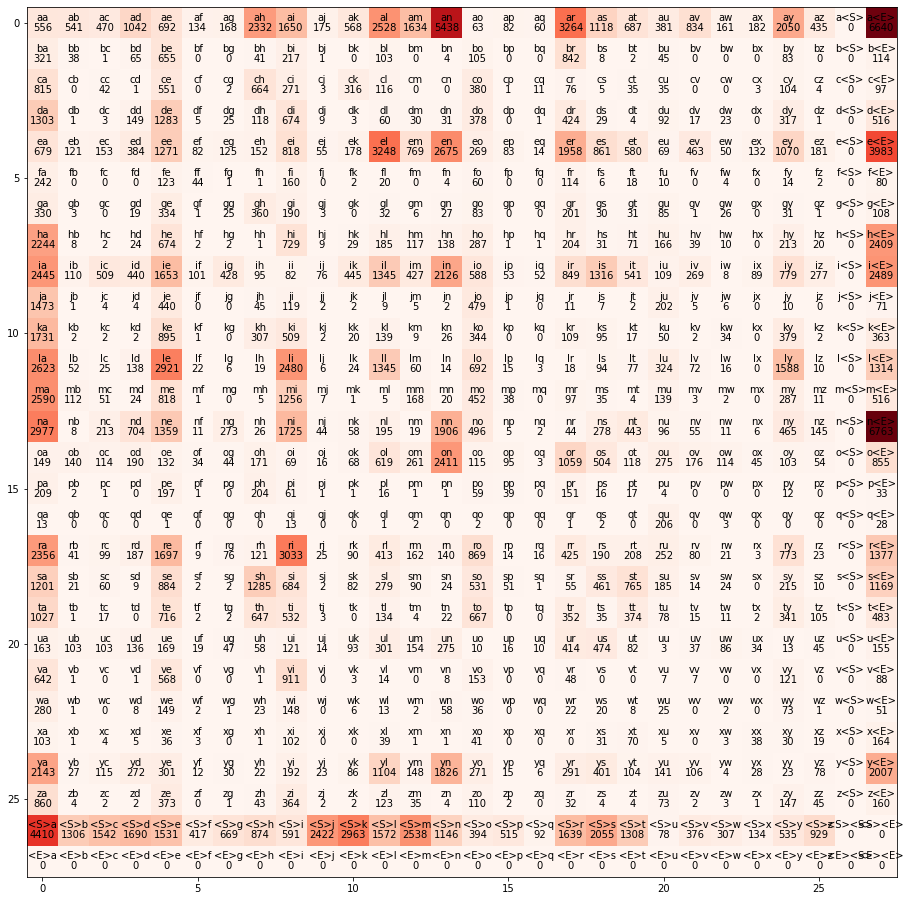

In [12]:
# plot for a nice visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap = 'Reds')

itos = {i:s for s, i in stoi.items()}

# add labels
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(x=j, y=i, s=chstr, ha="center", va="bottom")
        plt.text(x=j, y=i, s = N[i, j].item(), ha="center", va="top")

If we take a look at our visualization, we aren't actually being very clever. There is an entire row and column filled with zeroes.

The row filled with zeroes has the `'<E>'` at the beginning of the bigram, and this is because the `'<E>'` character will never possibly be as the start of the bigram. 

A similar issue goes the `'<S>'` character, which will never possibly be the second character of a bigram.

In addition, there are some combinations that don't make sense like: `'<E><S>'`, `'<E><E>'`, `'<S><S>'`. 

The only combination that would make sense is `'<S><E>'` which would stand for when there are no letters in a word, an empty word.

The takeaway is the we are wasting space.

The convention in Natural Language Processing is to use brackets `<>` to denote special tokens, but we shall use a single token called `'.'` instead.

In [13]:
N = torch.zeros(size = (27, 27), dtype=torch.int32)

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [14]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

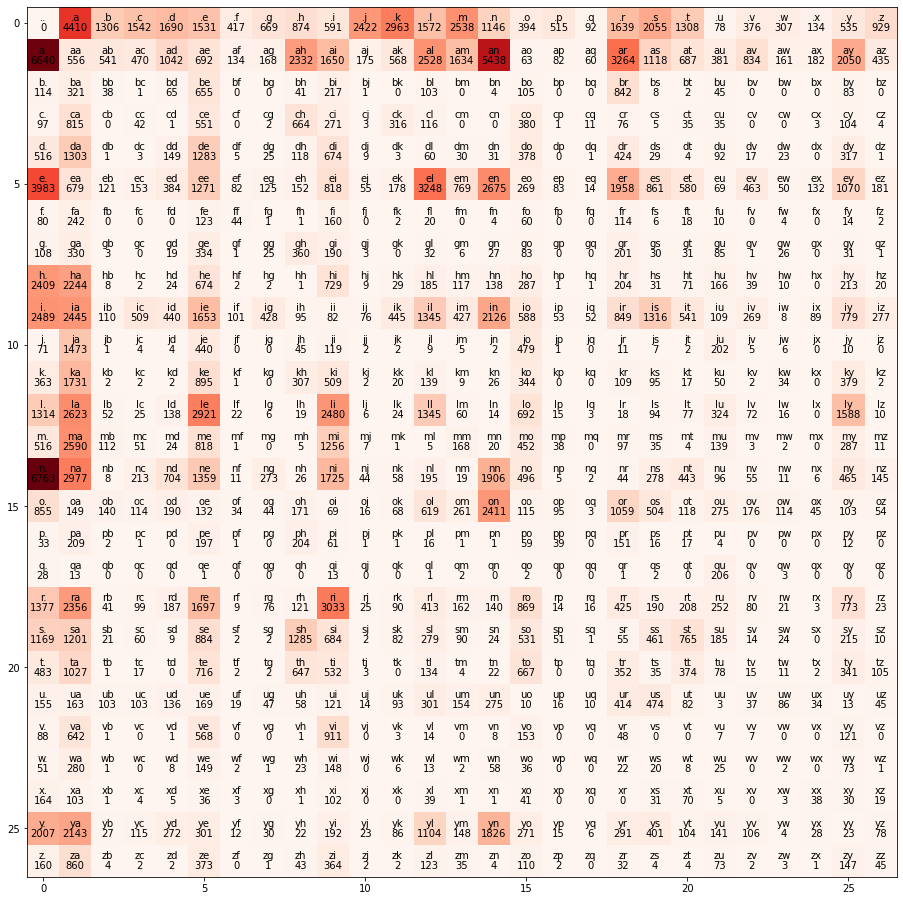

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap = 'Reds')

for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(x=j, y=i, s=chstr, ha="center", va="bottom")
        plt.text(x=j, y=i, s = N[i, j].item(), ha="center", va="top")

We can now try sampling from our counts to form words.

In order to sample from our counts, we need to convert our counts to a probability distribution to pull from.

We can use a `Torch.multinomial` to give probabilities and get integers out that will roughly follow the probability distribution.

In [16]:
# to make everything deterministic
g = torch.Generator().manual_seed(42)

# produce probabilities
p = torch.rand(3, generator=g)
p = p / p.sum()
print(p)

# pull samples from distribution
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([0.4047, 0.4197, 0.1756])


tensor([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1,
        1, 0, 1, 2, 0, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1,
        0, 2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 0, 2,
        0, 2, 0, 0, 0, 1, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
        0, 1, 0, 1])

In [17]:
# start on the first row (distribution of first characters) and 
# pull from the distribution, then
# move to the ixth row (distribution of characters after itos[ix]) and
# pull from distribution until we get 0 -> '.'
ix = 0
while True:
    p = N[ix].float()
    p = p / p.sum()
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    print(itos[ix])
    if ix == 0:
        break

k
e
l
e
s
i
s
u
m
r
a
n
a
.


In [103]:
# generate some more words
g = torch.Generator().manual_seed(42)
for i in range(5):
    out = []
    ix = 0
    while True:
        p = N[ix].float()
        p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

a.
a.
keys.
a.
hmone.


These generated names are name-like, but they are still quite off.

An example of how bad is the fact that it produces single letter names, like `a.`

But, if you think thorugh it from the model's eyes, it doesn't now that "a" is the very first letter of the word, it just knows that "a" was the previous character, and then it asks how likely is "a" to be the last character of the word? Well, it turns out it's quite likely.

However, we can still convince ourselves that the model is still doing something interesting by looking at how things would look if any character had a equal chance of being the next character.

In [19]:
# demonstration with how we are still doing something interesting
g = torch.Generator().manual_seed(42)
for i in range(20):
    out = []
    ix = 0
    while True:
        p = torch.ones(27) / 27.0
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

aacanlyybcdjvwjpbrpkbrhh.
aydgcfffhppv.
hkyckgzvjbqoslbpmzfjpg.
sfqikpxrcozhaq.
oqchqmrdxzfs.
bysbmygopayiiunrnlioqkd.
.
etxbyoqegjusgtf.
wwmkbxmusebqieinjmkrcptjpsnurjeylgxryzmdqztwhba.
kqmjtugqrashrmaohdtgtdwh.
fzvuviiu.
ehnwkuleuxvbcrsaxotjmrwo.
uysaqqbqexsmz.
rcachflm.
nqxnwbmrfgocthfbxcpuseelhpniv.
lmrreny.
ruveel.
njknq.
rxmbinxjmvmbhoehuii.
alsekzbbivrsncgruetkb.


We need to go back for efficiency reasons and make our code more efficient and get some practice with manipulating N-dimensional `Tensors`, because if we want to build out all the way to Transformers, we are going need to be doing to some complex array operations for efficiency and we need to really understand them and be good at it.

In [20]:
# we need convert the counts Tensor to a Tensor of probabilities

# convert to float
P = N.float()
# take sum of each row and divide each row by its own sum
P /= P.sum(dim=1, keepdim=True)
# rows should be normalized
P.shape

torch.Size([27, 27])

So far, we've "trained" a bigram language model by counting the frequency of each character pair and normalizing them to get a nice probability distribution.

In effect, the probabilities are the parameters of our model.

Now, how can we evaulate the quality of this model?

Can we summarize the quality of this model into a single number, like how well it does on predicting from the training set?

Let's create a loss function to evaluate our model.

How can we summarize probabilities for each character pair into a single number that measures the quality of the model?

What's typically used is the Likelihood, which is the product of these probabilities.

In [21]:
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        # get the probability from our Tensor
        prob = P[ix1, ix2]
        print(f'{ch1}{ch2}: prob:{prob:.4f}')

.e: prob:0.0478
em: prob:0.0377
mm: prob:0.0253
ma: prob:0.3899
a.: prob:0.1960
.o: prob:0.0123
ol: prob:0.0780
li: prob:0.1777
iv: prob:0.0152
vi: prob:0.3541
ia: prob:0.1381
a.: prob:0.1960
.a: prob:0.1377
av: prob:0.0246
va: prob:0.2495
a.: prob:0.1960


The product of probabilities is too small to work with.

For convenience what people work with is not the likelihood, but the log likelihood.

Things makes things even more easier because the 

$log(abc) = log(a) + log(b) + log(c)$, so it turns into a sum.

In [22]:
log_likelihood = 0.0
n = 0
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        # get the probability from our Tensor
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: prob:{prob:.4f}, logprob{logprob:.4f}')

print(f'{log_likelihood=}')

# what we'd like is a loss function
# a loss function has the semantics that low = good, so
# we need to inverse this, which gives us:
# negative log likelihood

nll = -log_likelihood

print(f'negative log likelihood loss function: {nll=}')

# another modification people do
# for convenience make nll into average instead of a sum

print(f'{nll / n}')


.e: prob:0.0478, logprob-3.0408
em: prob:0.0377, logprob-3.2793
mm: prob:0.0253, logprob-3.6772
ma: prob:0.3899, logprob-0.9418
a.: prob:0.1960, logprob-1.6299
.o: prob:0.0123, logprob-4.3982
ol: prob:0.0780, logprob-2.5508
li: prob:0.1777, logprob-1.7278
iv: prob:0.0152, logprob-4.1867
vi: prob:0.3541, logprob-1.0383
ia: prob:0.1381, logprob-1.9796
a.: prob:0.1960, logprob-1.6299
.a: prob:0.1377, logprob-1.9829
av: prob:0.0246, logprob-3.7045
va: prob:0.2495, logprob-1.3882
a.: prob:0.1960, logprob-1.6299
log_likelihood=tensor(-38.7856)
negative log likelihood loss function: nll=tensor(38.7856)
2.424102306365967


The goal is to maximize the likelihod of the data w.r.t model parameters.

This is equivalent to maximizing the log likelihood,
which is equivalent to minimizing the negative log likelihood.

Then in practice, people actually minimize the average negative log likelihood as our loss function.

In effect, our loss function summarizes the quality of our model and we'd like to minimize it and make it as small as possible.

The lowest our loss function can get is 0 and the lower it is, the better off our model is because it is assigning higher probabilities to the actual bigrams in our dataset. (assuming we evaluate using our training dataset)


In [23]:
# if we introduce some pairs it has 0 counts for,
# e.g. 'jq'
# our loss is negative Infinity, which is not ideal

# fix, add some fake counts 
# called model smoothing
P = (N + 1).float()
P /= P.sum(1, keepdim=True)

log_likelihood = 0.0
n = 0
for w in ['stephenjq']:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        # get the probability from our Tensor
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: prob:{prob:.4f}, logprob{logprob:.4f}')

nll = -log_likelihood
print(f'{nll= }')


.s: prob:0.0641, logprob-2.7468
st: prob:0.0942, logprob-2.3625
te: prob:0.1281, logprob-2.0549
ep: prob:0.0041, logprob-5.4949
ph: prob:0.1947, logprob-1.6364
he: prob:0.0883, logprob-2.4268
en: prob:0.1309, logprob-2.0337
nj: prob:0.0025, logprob-6.0109
jq: prob:0.0003, logprob-7.9817
q.: prob:0.0970, logprob-2.3331
nll= tensor(35.0819)


We've now trained a respectable, bigram character-level language model, but let's take an alternative approach.

We will end up in a very similiar position, but the approach will be very different, because we can cast the problem of bigram character-level language modeling into a neural network framework.

In a neural network framework, we are going to approach the problem very differently, but arrive at a very similar spot. 

Our neural network is still going to be a bigram character-level language model.

It will receive a single character as input, then there's our neural network with some parameters, and its going to output what is likely to follow the input into the model.

Because of the loss function we have now, we can evaluate any settings of the parameters of our neural net by taking a look at the probability distribution and use the next character in the bigram as our labels.

We're going to use gradient-based optimization to tune the weights of our network so that they predict the correct probabilities for our examples.



In [24]:
# create a training set
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

print(xs)
print(ys)

. e
e m
m m
m a
a .
tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


How are we going to feed our examples into our neural net?

Our examples are integer indexes.

A common way of encoding integers is one-hot encoding.

We can create a vector of all 0s except for the index corresponding to the integer, which is turned into a 1.

In [25]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27)

In [26]:
xenc.dtype

torch.int64

Another issue to be careful with is: datatypes

When we are plugging numbers into neural nets, we don't want them to be integers.

We want them to be floating point numbers that can take on various values.

The dtype here is `int64` which we don't want. 

We instead need to cast the result to `float32`, which is what we want because floats can feed into neural nets.

In [27]:
xenc = xenc.float()
xenc.dtype

torch.float32

Now let's start implementing our "neural net".

It's going to be very simple at first and we are going to implement it with basic matrix multiplication.

In [28]:
# initialize weights of a single test neuron by drawing from a normal distribution.
w = torch.randn((27, 1))

# run matrix multipication on single neuron
# 5, 27 @ 27, 1
xenc @ w

tensor([[-1.9752],
        [ 1.5943],
        [-0.7578],
        [-0.7578],
        [-0.8275]])

The result is the 5 activations of a single neuron on the 5 inputs, evaluated in parallel.

Now, let's create 27 neurons.

In [29]:
# initialize weights with 27 neurons
w = torch.randn((27, 27))

# run matrix multiplication on 27 neurons
# (5, 27) @ (27, 27) -> (5, 27)
xenc @ w

tensor([[ 2.4052e+00,  4.9266e-01, -1.8312e+00, -1.0867e+00,  1.7789e+00,
          4.5558e-01, -4.3344e-01,  6.8688e-01,  2.3662e+00,  7.1906e-01,
         -5.8891e-01, -7.8808e-01,  8.8034e-02, -1.2991e+00, -7.8925e-01,
         -4.4174e-01, -2.5845e-01,  2.1754e-01,  1.1303e+00,  5.6179e-01,
         -9.4218e-01, -1.3970e-01,  6.3171e-01, -4.0965e-01,  4.3412e-01,
         -4.1570e-03, -7.8917e-01],
        [-1.0025e+00,  4.4717e-01,  8.1705e-01,  1.5222e+00,  4.6988e-01,
          2.1945e+00,  2.6234e-01, -1.0800e-01,  1.0462e+00,  3.1400e-01,
         -1.1216e+00,  4.3212e-01, -1.0359e+00,  2.9083e+00,  1.5170e+00,
          1.7271e+00, -1.7665e-01,  2.4412e-01, -2.6332e-01,  1.1268e+00,
          1.3799e-01, -1.0502e+00, -4.7868e-01, -2.1771e-03,  3.5546e-01,
         -1.2070e+00, -1.1296e+00],
        [-2.8207e-01, -7.0357e-01, -7.5616e-01, -6.5441e-01,  9.6991e-01,
         -3.6171e-01,  4.4307e-01, -4.2541e-01, -1.7374e-01, -1.4949e+00,
          5.2001e-01, -4.5407e-01,  1.61

What is every element here telling us?

For every one of 27 neurons we created, it tells us the firing rate of the neurons on every example.

For example:

`(xenc @ w)[3, 13] ` gives us the firing rate of the 13th neuron when it takes in the 3rd example.

By using matrix multipication, we can very efficiently evaluate the dot product between lots of examples in a batch, in parallel.

In [32]:
# sanity check
print((xenc @ w)[3, 13])
(xenc[3] * w[:, 13]).sum()

tensor(0.1957)


tensor(0.1957)

So far our neurons compute w*x, but don't have a nonlinearity and don't have a bias.

But that's okay, we are going to leave our neural net as a single linear layer.

One of the dumbest, smallest neural nets of all time basically.

Now that we have settled on the architecture for now, we can focus on massaging our outputs
to produce a probability distribution for the next character in the sequence.

As of right now, what is being produced is a range of positive and negative numbers, not probabilities that sum to 1, which is something that can't be output from a neural net.

Counts are also not a good thing to output from a neural net, since they are positive, integers.

We can work with this however, and interpret the outputs of the neural net as the $log$ of the "counts" of the next character in the sequence, where entry with the highest count is chosen as the next character in the sequence.

We can then exponentiate these log(counts) to get something close to our original counts.

Then, we can normalize these counts to get some probabilities, which we can interpret as the neural net's assignment for how likely every one the 27 characters are to come next.

In [53]:
# interpret neural net output as log(counts)
logits = xenc @ w
# counts = e^(log(counts))
counts = logits.exp()
# probabilities
probs = counts / counts.sum(dim=1, keepdim = True)
# probabilities given example 1
probs[0]

tensor([0.2083, 0.0308, 0.0030, 0.0063, 0.1113, 0.0296, 0.0122, 0.0374, 0.2003,
        0.0386, 0.0104, 0.0085, 0.0205, 0.0051, 0.0085, 0.0121, 0.0145, 0.0234,
        0.0582, 0.0330, 0.0073, 0.0163, 0.0354, 0.0125, 0.0290, 0.0187, 0.0085])

Using this set of operations to process the output of the neural net into sets of probabilities is very useful because these operations are differentiable.

Because these operations are differentiable, we can backpropogate through them to adjust our parameters.

The last set of operations we just did are actually called a "softmax", which is a way of taking outputs from a neural net (positive or negative) and outputs probability distributions.

Next, let's take a look at how our network is performing with a small sample of training data.

In [60]:
nlls = torch.zeros(5)
for i in range(5):
    # x is first character in index form
    x = xs[i].item()
    # y is next character in index form
    y = ys[i].item()
    print(f'bigram example {i + 1}: {itos[x]}{itos[y]} | indexes: {x}, {y}')
    print('input to the neural net', x)
    print('output of probabilites from the neural net', probs[i])
    print('label (actual following character)', y)
    print('probability assigned by the net to the correct character:', probs[i, y], '\nshould be as high as possible')
    log_likelihood = torch.log(probs[i, y])
    print('log likelihood:', log_likelihood.item())
    nll = -log_likelihood
    print('negative log likelihood:', nll.item())
    nlls[i] = nll
print('--------')
print("average negative log likelihood, i.e. loss =", nlls.mean().item())

bigram example 1: .e | indexes: 0, 5
input to the neural net 0
output of probabilites from the neural net tensor([0.2083, 0.0308, 0.0030, 0.0063, 0.1113, 0.0296, 0.0122, 0.0374, 0.2003,
        0.0386, 0.0104, 0.0085, 0.0205, 0.0051, 0.0085, 0.0121, 0.0145, 0.0234,
        0.0582, 0.0330, 0.0073, 0.0163, 0.0354, 0.0125, 0.0290, 0.0187, 0.0085])
label (actual following character) 5
probability assigned by the net to the correct character: tensor(0.0296) 
should be as high as possible
log likelihood: -3.518400192260742
negative log likelihood: 3.518400192260742
bigram example 2: em | indexes: 5, 13
input to the neural net 5
output of probabilites from the neural net tensor([0.0054, 0.0231, 0.0335, 0.0678, 0.0237, 0.1327, 0.0192, 0.0133, 0.0421,
        0.0202, 0.0048, 0.0228, 0.0052, 0.2710, 0.0674, 0.0832, 0.0124, 0.0189,
        0.0114, 0.0456, 0.0170, 0.0052, 0.0092, 0.0148, 0.0211, 0.0044, 0.0048])
label (actual following character) 13
probability assigned by the net to the correct c

The neural network is currently assigning freakishly low probabilities to the correct characters, which is not good.

For example, the neural net is assigning the probability of 'e' following '.' as around 3% likely, but this is not good because this is literally
a training example, so it should be assigning way higher probabilities.

This is tolerable for now however, since our model's weights haven't changed yet from their random, initialized state.

Overall the loss is 3.5703.... which is quite high, but that's okay.

Because we have a loss function made up of differentiable operations, we can minimize the loss by tuning the weights of the network by computing the gradients of the loss w.r.t weights, and find a good setting of the weights through gradient-based optimization.

Now let's bring everything together and do some optimization.

In [84]:
# create dataset

xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

n = xs.nelement()

# initialize weights of 27 neurons
g = torch.Generator().manual_seed(42)
W = torch.randn(size=(27, 27), generator=g, requires_grad=True)

In [96]:
## gradient descent
for k in range(100):
    # forward pass (run thru network, compute loss) | run through the computational graph, while keeping track of operations and derivatives
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(dim=1, keepdim=True)
    # assigned probability to correct character
    assigned = probs[torch.arange(n), ys]
    loss = -assigned.log().mean()
    print(k, 'loss:', loss.item())

    # backward pass (zero out gradients, then compute gradients w.r.t loss)
    W.grad = None
    loss.backward()

    # update weights
    W.data += -10 * W.grad

0 loss: 2.472581624984741
1 loss: 2.4725401401519775
2 loss: 2.4724984169006348
3 loss: 2.4724574089050293
4 loss: 2.4724161624908447
5 loss: 2.4723753929138184
6 loss: 2.472334146499634
7 loss: 2.4722938537597656
8 loss: 2.4722533226013184
9 loss: 2.47221302986145
10 loss: 2.472172737121582
11 loss: 2.472132921218872
12 loss: 2.472092866897583
13 loss: 2.472053289413452
14 loss: 2.472013473510742
15 loss: 2.4719741344451904
16 loss: 2.471935272216797
17 loss: 2.471896171569824
18 loss: 2.4718573093414307
19 loss: 2.471818447113037
20 loss: 2.4717800617218018
21 loss: 2.4717416763305664
22 loss: 2.47170352935791
23 loss: 2.471665382385254
24 loss: 2.4716272354125977
25 loss: 2.4715895652770996
26 loss: 2.4715518951416016
27 loss: 2.4715144634246826
28 loss: 2.4714770317077637
29 loss: 2.471439838409424
30 loss: 2.471403121948242
31 loss: 2.4713661670684814
32 loss: 2.4713292121887207
33 loss: 2.471292495727539
34 loss: 2.4712562561035156
35 loss: 2.471220016479492
36 loss: 2.4711835384

Takeaway:

Before, the loss of the language model was around 2.47, in the very first implementation of the language model, and
we had arrived at a particular set of weights that produced that loss by purely taking counts of each character pair 
and then translated those counts into probabilities by normalizing them.

We have shown that we arrive at the same result through gradient based optimization. 

We probably can't get anything better since fundamentally both models are taking in a very small amount of information, 
which is the previous character, and then trying to predict the next one.

However, instead of achieving the same result explicitly by counting and normalizing, we are doing it through a gradient based-approach.

The gradient-based aproach is actually significantly more flexible, because we can expand our appoach and complexify the neural net.

With this approach, we can take multiple previous characters and feed them into increasingly more complex neural nets.

So as we complexify, we can still use the same machinery to optimize.

Something else to realize is that the table of counts approach is managable when we are dealing with a single previous character.

However, it becomes unscalable as you add more previous characters. 

If we were to take the counts upon looking at the previous 10 characters, the combinatorics becomes overwhelming.

Through the gradient based approach, the counts are intialized to be random and then let the loss guide us to arrive us at the optimal number of counts.

In [102]:
# sampling from our neural net
g = torch.Generator().manual_seed(42)

for i in range(5):
    out = []
    # ix is the index corresponding to a character e.g 1 -> 'a'
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        # logits is the log of counts
        logits = xenc @ W
        counts = logits.exp()
        # probabilities of next character
        probs = counts / counts.sum(dim=1, keepdim=True)
        # draw a sample from distribution 
        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))


a.
a.
keys.
a.
hmone.


Kinda anti-climatic lmao.

Our neural net produces the exact same result as the model implemented through purely counting the frequencies of all the bigrams and normalizing, but
the keys here is that we arrived at the same place by initializing with random numbers and then using the loss as a guide to optimizing the "counts" matrix so that the loss is minimized. 

This will complexify and we will be taking more previous characters and complexifying our neural nets all the way to Transformers.
